<a href="https://www.kaggle.com/code/subhajeetdas/ionosphere-depletion-classification?scriptVersionId=126992797" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.9.1 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.20.1 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/ionosphere-depletion-dataset/ionosphere.csv


# Load Data

In [3]:
df = pd.read_csv("/kaggle/input/ionosphere-depletion-dataset/ionosphere.csv")
df

atr1  atr2     atr3     atr4     atr5     atr6     atr7     atr8  \
0       1     0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708   
1       1     0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597   
2       1     0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062   
3       1     0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000   
4       1     0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255   
..    ...   ...      ...      ...      ...      ...      ...      ...   
346     1     0  0.83508  0.08298  0.73739 -0.14706  0.84349 -0.05567   
347     1     0  0.95113  0.00419  0.95183 -0.02723  0.93438 -0.01920   
348     1     0  0.94701 -0.00034  0.93207 -0.03227  0.95177 -0.03431   
349     1     0  0.90608 -0.01657  0.98122 -0.01989  0.95691 -0.03646   
350     1     0  0.84710  0.13533  0.73638 -0.06151  0.87873  0.08260   

        atr9    atr10  ...    atr26    atr27    atr28    atr29    atr30  \
0    1.00000  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090   
1    1.00000 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593   
2    0.88965  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365   
3    0.00000  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099   
4    0.77152 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197   
..       ...      ...  ...      ...      ...      ...      ...      ...   
346  0.90441 -0.04622  ... -0.04202  0.83479  0.00123  1.00000  0.12815   
347  0.94590  0.01606  ...  0.01361  0.93522  0.04925  0.93159  0.08168   
348  0.95584  0.02446  ...  0.03193  0.92489  0.02542  0.92120  0.02242   
349  0.85746  0.00110  ... -0.02099  0.89147 -0.07760  0.82983 -0.17238   
350  0.88928 -0.09139  ... -0.15114  0.81147 -0.04822  0.78207 -0.00703   

       atr31    atr32    atr33    atr34  target  
0    0.42267 -0.54487  0.18641 -0.45300       g  
1   -0.16626 -0.06288 -0.13738 -0.02447       b  
2    0.60436 -0.24180  0.56045 -0.38238       g  
3    0.25682  1.00000 -0.32382  1.00000       b  
4   -0.05707 -0.59573 -0.04608 -0.65697       g  
..       ...      ...      ...      ...     ...  
346  0.86660 -0.10714  0.90546 -0.04307       g  
347  0.94066 -0.00035  0.91483  0.04712       g  
348  0.92459  0.00442  0.92697 -0.00577       g  
349  0.96022 -0.03757  0.87403 -0.16243       g  
350  0.75747 -0.06678  0.85764 -0.06151       g  

[351 rows x 35 columns]

# Data Cleaning, Information & Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   atr1    351 non-null    int64  
 1   atr2    351 non-null    int64  
 2   atr3    351 non-null    float64
 3   atr4    351 non-null    float64
 4   atr5    351 non-null    float64
 5   atr6    351 non-null    float64
 6   atr7    351 non-null    float64
 7   atr8    351 non-null    float64
 8   atr9    351 non-null    float64
 9   atr10   351 non-null    float64
 10  atr11   351 non-null    float64
 11  atr12   351 non-null    float64
 12  atr13   351 non-null    float64
 13  atr14   351 non-null    float64
 14  atr15   351 non-null    float64
 15  atr16   351 non-null    float64
 16  atr17   351 non-null    float64
 17  atr18   351 non-null    float64
 18  atr19   351 non-null    float64
 19  atr20   351 non-null    float64
 20  atr21   351 non-null    float64
 21  atr22   351 non-null    float64
 22  at

In [5]:
df.isnull().sum()

atr1      0
atr2      0
atr3      0
atr4      0
atr5      0
atr6      0
atr7      0
atr8      0
atr9      0
atr10     0
atr11     0
atr12     0
atr13     0
atr14     0
atr15     0
atr16     0
atr17     0
atr18     0
atr19     0
atr20     0
atr21     0
atr22     0
atr23     0
atr24     0
atr25     0
atr26     0
atr27     0
atr28     0
atr29     0
atr30     0
atr31     0
atr32     0
atr33     0
atr34     0
target    0
dtype: int64

In [6]:
df.shape

(351, 35)

In [7]:
df.size

12285

In [8]:
df.describe().T

count      mean       std  min       25%      50%       75%  max
atr1   351.0  0.891738  0.311155  0.0  1.000000  1.00000  1.000000  1.0
atr2   351.0  0.000000  0.000000  0.0  0.000000  0.00000  0.000000  0.0
atr3   351.0  0.641342  0.497708 -1.0  0.472135  0.87111  1.000000  1.0
atr4   351.0  0.044372  0.441435 -1.0 -0.064735  0.01631  0.194185  1.0
atr5   351.0  0.601068  0.519862 -1.0  0.412660  0.80920  1.000000  1.0
atr6   351.0  0.115889  0.460810 -1.0 -0.024795  0.02280  0.334655  1.0
atr7   351.0  0.550095  0.492654 -1.0  0.211310  0.72873  0.969240  1.0
atr8   351.0  0.119360  0.520750 -1.0 -0.054840  0.01471  0.445675  1.0
atr9   351.0  0.511848  0.507066 -1.0  0.087110  0.68421  0.953240  1.0
atr10  351.0  0.181345  0.483851 -1.0 -0.048075  0.01829  0.534195  1.0
atr11  351.0  0.476183  0.563496 -1.0  0.021120  0.66798  0.957895  1.0
atr12  351.0  0.155040  0.494817 -1.0 -0.065265  0.02825  0.482375  1.0
atr13  351.0  0.400801  0.622186 -1.0  0.000000  0.64407  0.955505  1.0
atr14  351.0  0.093414  0.494873 -1.0 -0.073725  0.03027  0.374860  1.0
atr15  351.0  0.344159  0.652828 -1.0  0.000000  0.60194  0.919330  1.0
atr16  351.0  0.071132  0.458371 -1.0 -0.081705  0.00000  0.308975  1.0
atr17  351.0  0.381949  0.618020 -1.0  0.000000  0.59091  0.935705  1.0
atr18  351.0 -0.003617  0.496762 -1.0 -0.225690  0.00000  0.195285  1.0
atr19  351.0  0.359390  0.626267 -1.0  0.000000  0.57619  0.899265  1.0
atr20  351.0 -0.024025  0.519076 -1.0 -0.234670  0.00000  0.134370  1.0
atr21  351.0  0.336695  0.609828 -1.0  0.000000  0.49909  0.894865  1.0
atr22  351.0  0.008296  0.518166 -1.0 -0.243870  0.00000  0.188760  1.0
atr23  351.0  0.362475  0.603767 -1.0  0.000000  0.53176  0.911235  1.0
atr24  351.0 -0.057406  0.527456 -1.0 -0.366885  0.00000  0.164630  1.0
atr25  351.0  0.396135  0.578451 -1.0  0.000000  0.55389  0.905240  1.0
atr26  351.0 -0.071187  0.508495 -1.0 -0.332390 -0.01505  0.156765  1.0
atr27  351.0  0.541641  0.516205 -1.0  0.286435  0.70824  0.999945  1.0
atr28  351.0 -0.069538  0.550025 -1.0 -0.443165 -0.01769  0.153535  1.0
atr29  351.0  0.378445  0.575886 -1.0  0.000000  0.49664  0.883465  1.0
atr30  351.0 -0.027907  0.507974 -1.0 -0.236885  0.00000  0.154075  1.0
atr31  351.0  0.352514  0.571483 -1.0  0.000000  0.44277  0.857620  1.0
atr32  351.0 -0.003794  0.513574 -1.0 -0.242595  0.00000  0.200120  1.0
atr33  351.0  0.349364  0.522663 -1.0  0.000000  0.40956  0.813765  1.0
atr34  351.0  0.014480  0.468337 -1.0 -0.165350  0.00000  0.171660  1.0

<AxesSubplot:>

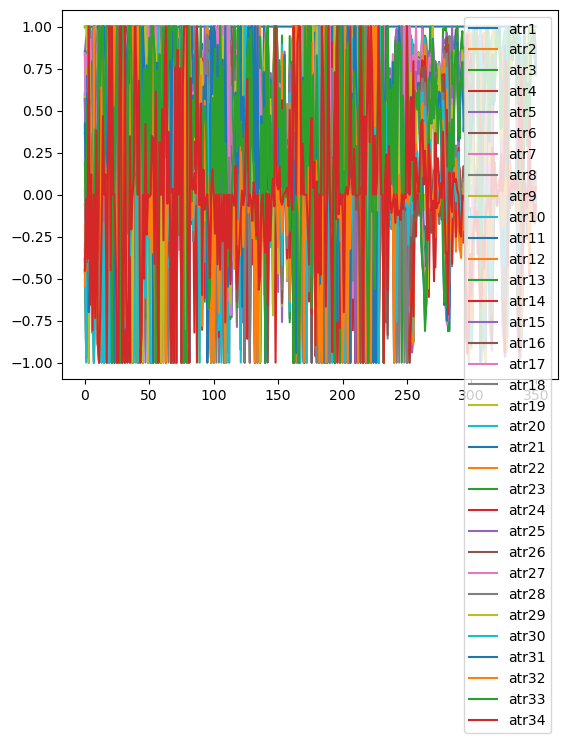

In [9]:
df.plot()

In [10]:
df['target'].value_counts()

g    225
b    126
Name: target, dtype: int64

In [11]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [12]:
df['target'].value_counts()

1    225
0    126
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='Density'>

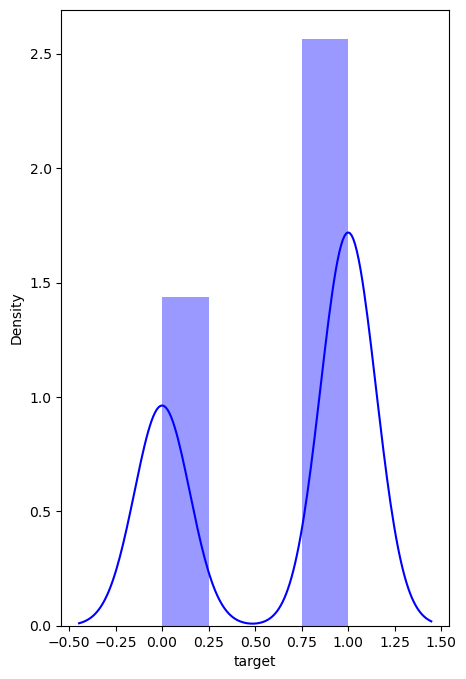

In [13]:
plt.figure(figsize=(5, 8))
sns.distplot(df['target'], color = 'blue')

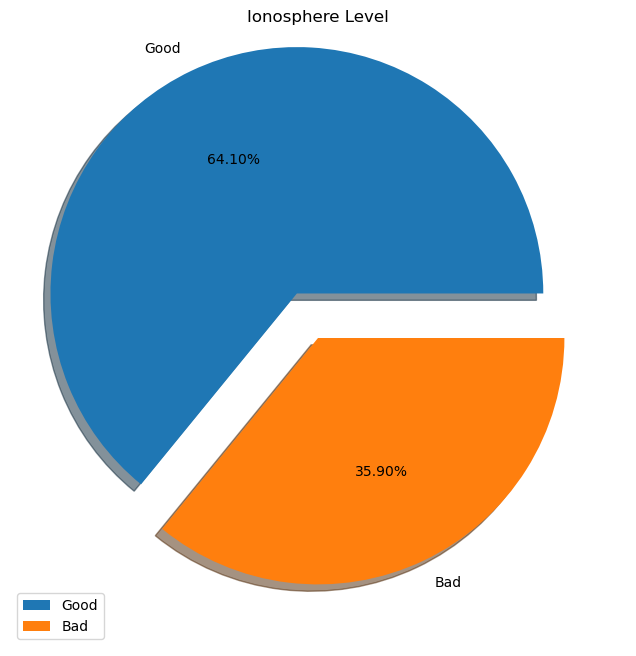

In [14]:
plt.figure(figsize=(8, 8))
plt.title("Ionosphere Level")
plt.pie(df['target'].value_counts(), explode = (0.2, 0.0), labels = ["Good", "Bad"],autopct ='%1.2f%%', shadow = True)
plt.legend()

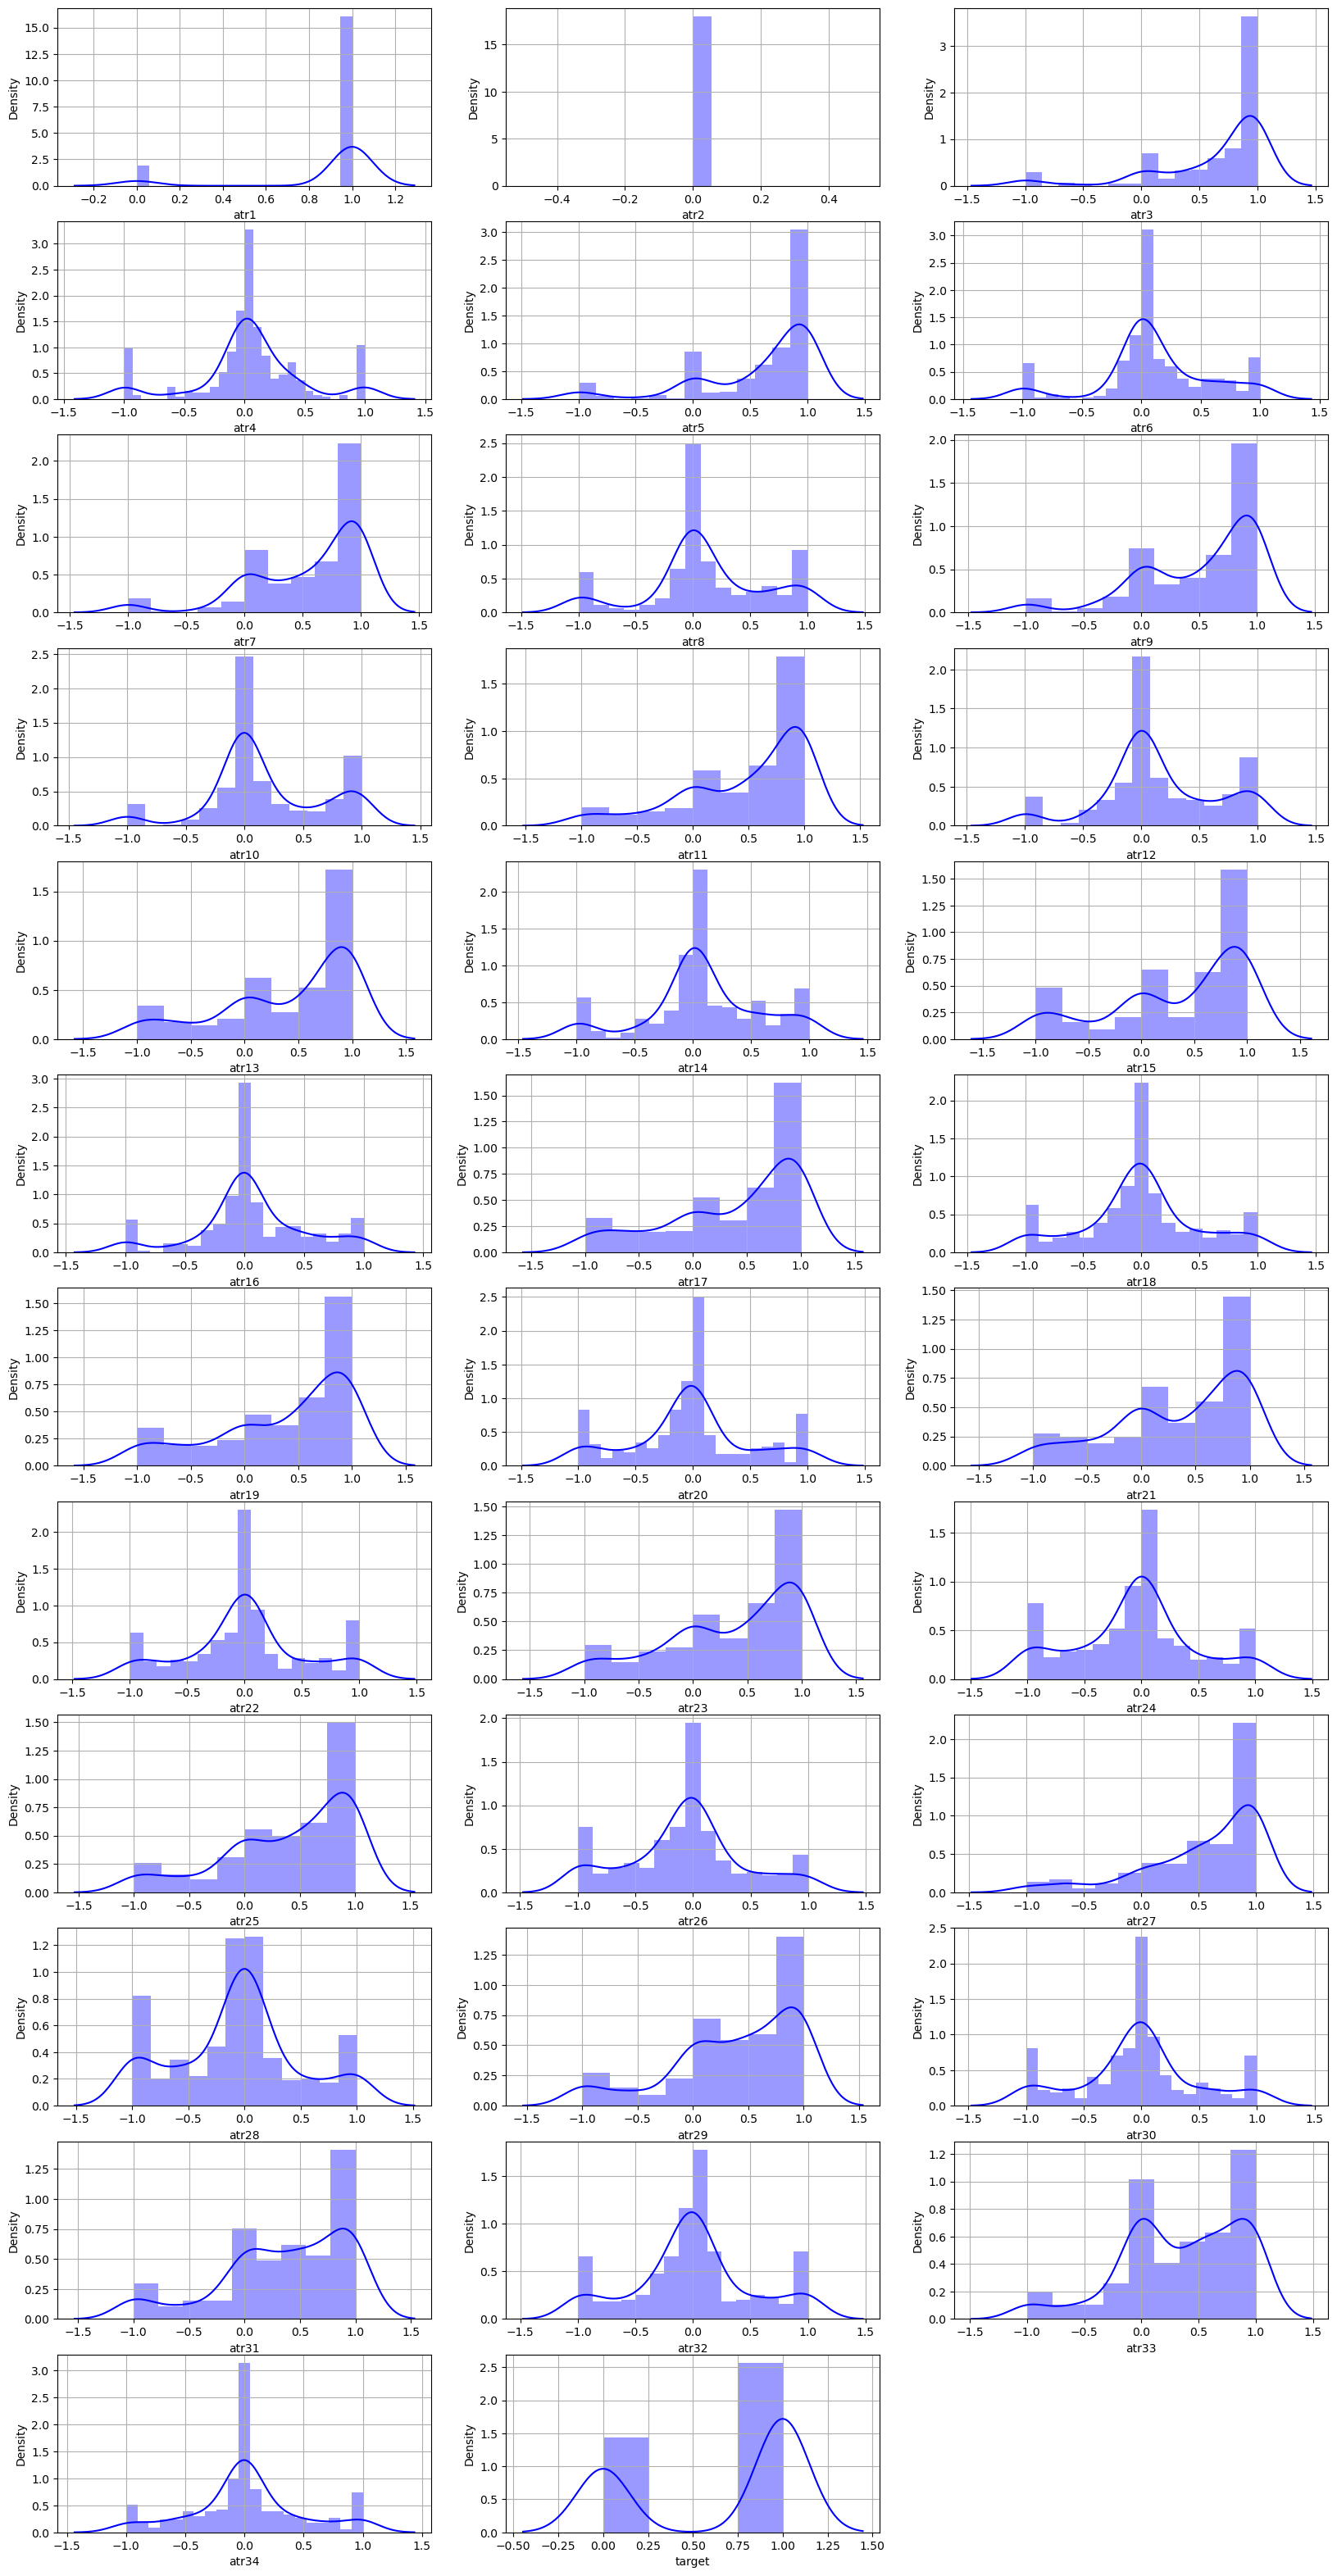

In [15]:
plt.figure(figsize = (20, 40))

for i in range(0, 35):
    plt.subplot(12, 3, i+1)
    sns.distplot(df.iloc[:, i], color = 'blue')
    plt.grid()

## As the attribute 2 contains only **0** value so, its irrelevant.

In [16]:
df.drop(['atr2'], axis = 1, inplace = True)
df

atr1     atr3     atr4     atr5     atr6     atr7     atr8     atr9  \
0       1  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1       1  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2       1  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3       1  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4       1  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   
..    ...      ...      ...      ...      ...      ...      ...      ...   
346     1  0.83508  0.08298  0.73739 -0.14706  0.84349 -0.05567  0.90441   
347     1  0.95113  0.00419  0.95183 -0.02723  0.93438 -0.01920  0.94590   
348     1  0.94701 -0.00034  0.93207 -0.03227  0.95177 -0.03431  0.95584   
349     1  0.90608 -0.01657  0.98122 -0.01989  0.95691 -0.03646  0.85746   
350     1  0.84710  0.13533  0.73638 -0.06151  0.87873  0.08260  0.88928   

       atr10    atr11  ...    atr26    atr27    atr28    atr29    atr30  \
0    0.03760  0.85243  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090   
1   -0.04549  0.50874  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593   
2    0.01198  0.73082  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365   
3    0.00000  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099   
4   -0.16399  0.52798  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197   
..       ...      ...  ...      ...      ...      ...      ...      ...   
346 -0.04622  0.89391  ... -0.04202  0.83479  0.00123  1.00000  0.12815   
347  0.01606  0.96510  ...  0.01361  0.93522  0.04925  0.93159  0.08168   
348  0.02446  0.94124  ...  0.03193  0.92489  0.02542  0.92120  0.02242   
349  0.00110  0.89724  ... -0.02099  0.89147 -0.07760  0.82983 -0.17238   
350 -0.09139  0.78735  ... -0.15114  0.81147 -0.04822  0.78207 -0.00703   

       atr31    atr32    atr33    atr34  target  
0    0.42267 -0.54487  0.18641 -0.45300       1  
1   -0.16626 -0.06288 -0.13738 -0.02447       0  
2    0.60436 -0.24180  0.56045 -0.38238       1  
3    0.25682  1.00000 -0.32382  1.00000       0  
4   -0.05707 -0.59573 -0.04608 -0.65697       1  
..       ...      ...      ...      ...     ...  
346  0.86660 -0.10714  0.90546 -0.04307       1  
347  0.94066 -0.00035  0.91483  0.04712       1  
348  0.92459  0.00442  0.92697 -0.00577       1  
349  0.96022 -0.03757  0.87403 -0.16243       1  
350  0.75747 -0.06678  0.85764 -0.06151       1  

[351 rows x 34 columns]

In [17]:
df_corr = df.corr()

<AxesSubplot:>

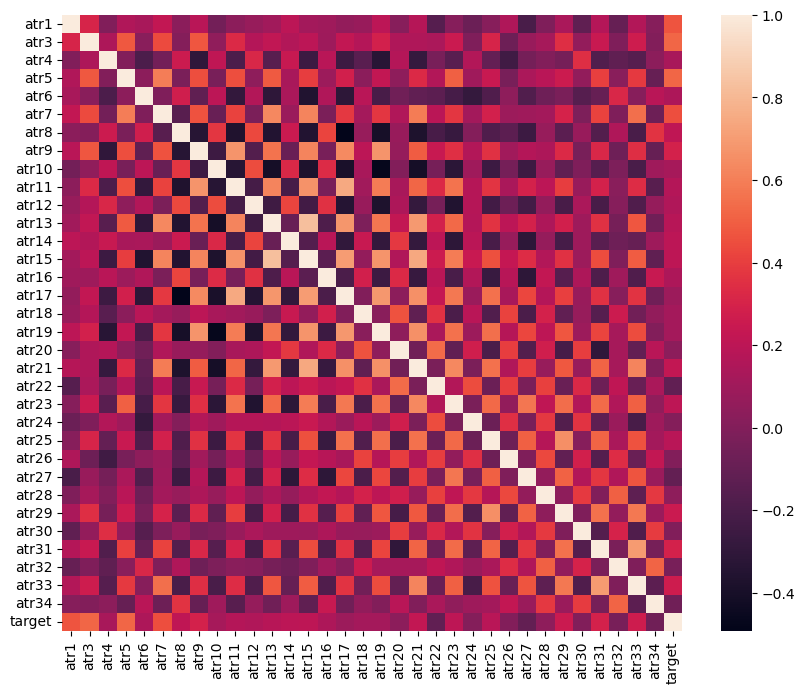

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr)

In [19]:
x = df.iloc[:, :33].values
x

array([[ 1.0000e+00,  9.9539e-01, -5.8890e-02, ..., -5.4487e-01,
         1.8641e-01, -4.5300e-01],
       [ 1.0000e+00,  1.0000e+00, -1.8829e-01, ..., -6.2880e-02,
        -1.3738e-01, -2.4470e-02],
       [ 1.0000e+00,  1.0000e+00, -3.3650e-02, ..., -2.4180e-01,
         5.6045e-01, -3.8238e-01],
       ...,
       [ 1.0000e+00,  9.4701e-01, -3.4000e-04, ...,  4.4200e-03,
         9.2697e-01, -5.7700e-03],
       [ 1.0000e+00,  9.0608e-01, -1.6570e-02, ..., -3.7570e-02,
         8.7403e-01, -1.6243e-01],
       [ 1.0000e+00,  8.4710e-01,  1.3533e-01, ..., -6.6780e-02,
         8.5764e-01, -6.1510e-02]])

In [20]:
y = df.iloc[:, -1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Train & Test Splitting the Data

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Function to Measure Performance

In [22]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Bad', 'Good'])
    cm.plot()

# Logistic Regression

In [23]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [24]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.9295774647887324
Recall :  0.9295774647887324
Accuracy :  0.9295774647887324
F1 Score :  0.9295774647887324

 [[25  5]
 [ 0 41]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        30
           1       0.89      1.00      0.94        41

    accuracy                           0.93        71
   macro avg       0.95      0.92      0.93        71
weighted avg       0.94      0.93      0.93        71

******************************************************



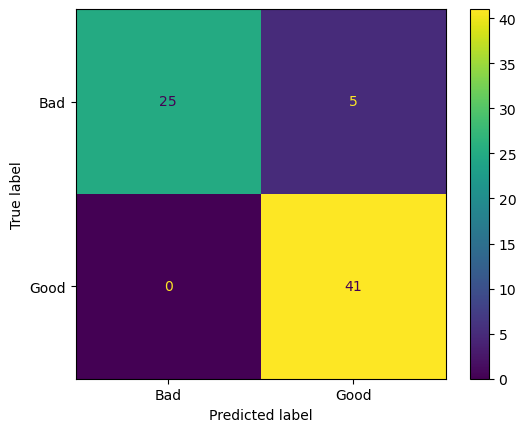

In [25]:
perform(y_pred_lr)

# Random Forest

In [26]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.9577464788732394
Recall :  0.9577464788732394
Accuracy :  0.9577464788732394
F1 Score :  0.9577464788732394

 [[28  2]
 [ 1 40]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.95      0.98      0.96        41

    accuracy                           0.96        71
   macro avg       0.96      0.95      0.96        71
weighted avg       0.96      0.96      0.96        71

******************************************************



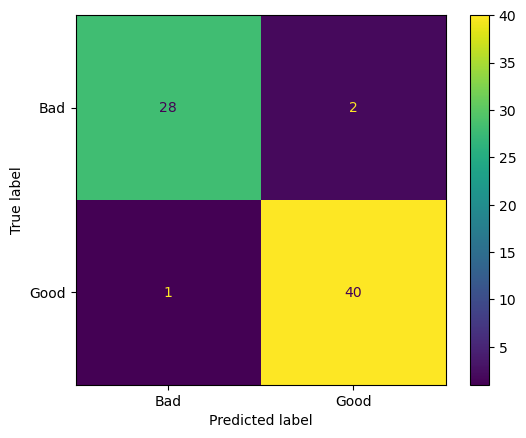

In [28]:
perform(y_pred_rf)

## Random Forest Visualization

In [29]:
feature_names = df.columns[0:33]

In [30]:
estimator = model_rf.estimators_[50]
estimator

DecisionTreeClassifier(max_features='auto', random_state=908783849)

In [31]:
viz_model = dtreeviz.model(estimator,
                           X_train = x_train, y_train = y_train,
                           feature_names = feature_names,
                           target_name = 'Ionosphere State',
                           class_names = ['Bad', 'Good'])

v = viz_model.view()     # render as SVG into internal object
v.save("Ionosphere state.svg")  # save as svg

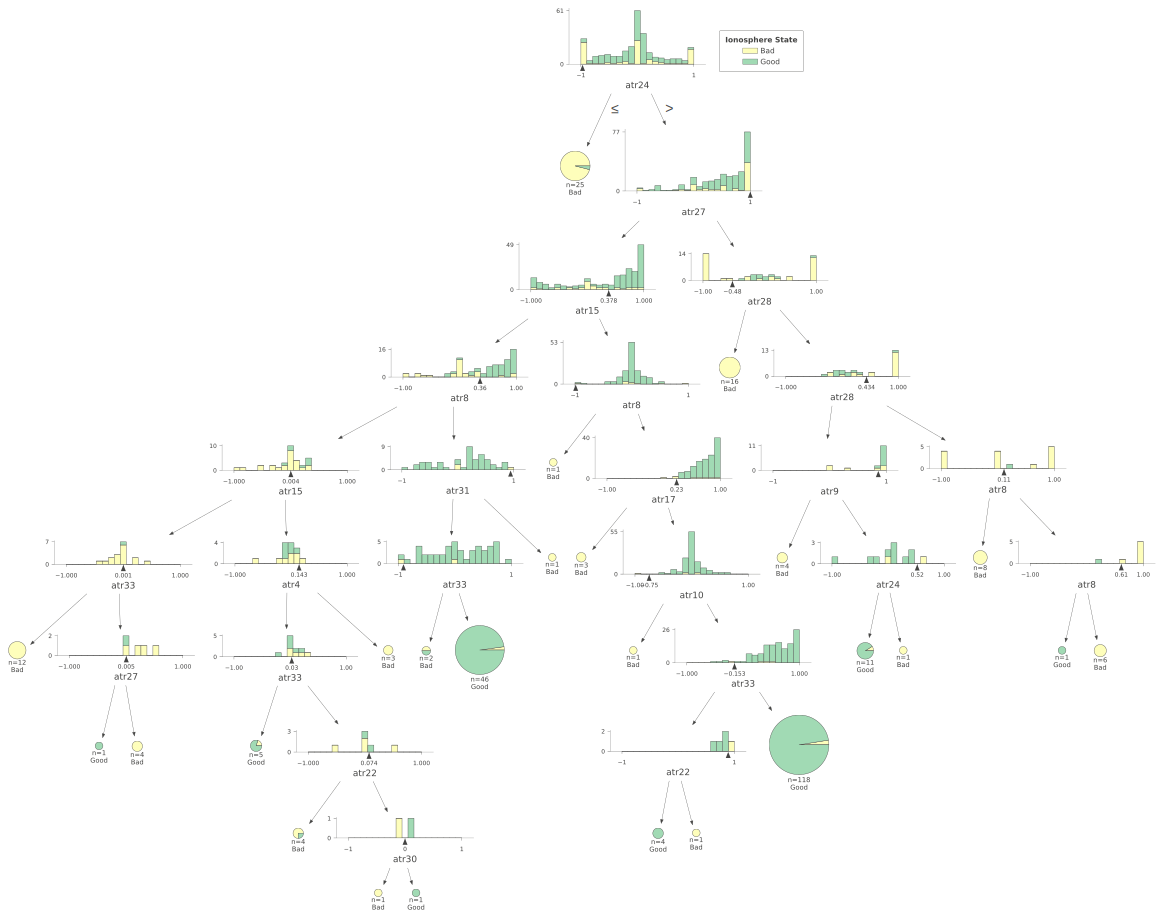

In [32]:
viz_model.view()

In [33]:
export_graphviz(estimator, out_file = 'Random_forest.dot', feature_names = feature_names,
                class_names = ['Bad', 'Good'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [34]:
!dot -Tpng Random_forest.dot -o Random_forest.png -Gdpi=600

In [35]:
from IPython.display import Image
Image(filename = 'Random_forest.png')

<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you For viewing this Notebook 😃, do upvote 🔼 if you like it and please feel free to provide any feedback.</em>
<p style="text-align:center"><img src="https://i.pinimg.com/originals/40/12/1a/40121a3616ecf2439a5b04d733b6f437.gif" width="480" height="200"></p>